## Generate time series data

In [102]:
import random, math, copy
import numpy as np

CHECK_INTERVAL = 1
N = 100
n = 50
np.random.seed(1)

def MGtimeSeries(start,end):
    ts = [1.5]
    series_end=1500+4
    for i in range(0, series_end):
        tmp = 0 if i<25 else ts[i - 25]
        ts.append(ts[i] + 0.2 * tmp / (1 + tmp ** 10) - 0.1 * ts[i]);
    # len od ts = 1505
    X = np.zeros((1200, 5))
    Y = np.zeros((1200,1))

    for i in range(start, end):
        X[i-start][0] = ts[i-20]
        X[i-start][1] = ts[i-15]
        X[i-start][2] = ts[i-10]
        X[i-start][3] = ts[i-5]
        X[i-start][4] = ts[i]
        Y[i-start][0] = ts[i+5]
    Y=np.ravel(Y)    
    print(X.shape)
    print(Y.shape)
   
    return ts, X, Y

(1200, 5)
(1200,)


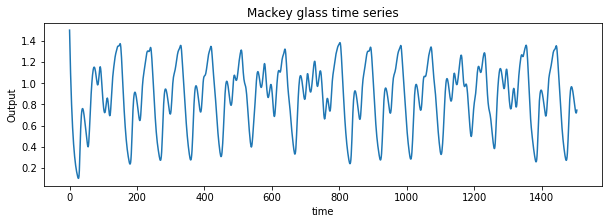

In [103]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

start=301
end=1500
time_series,X,Y=MGtimeSeries(start,end)
time_series=np.array(time_series, dtype=np.float32)
plt.plot(range(0,end+5), time_series.flatten())
plt.xlabel("time")
plt.ylabel("Output")
plt.title("Mackey glass time series")
plt.show()

## split data

In [159]:
trainX = X[0:1000]
trainY = Y[0:1000]

testX = X[1000:1200]
testY = Y[1000:1200]


## training

In [160]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [163]:
model = MLPRegressor(max_iter=10000, solver='lbfgs', alpha=10 ** (-3), hidden_layer_sizes=(2,5), shuffle=False, random_state = 1,early_stopping=True, validation_fraction = 0.1)
model.fit(trainX, trainY)
scores = model.score(testX, testY)
predY = model.predict(testX)
MSE = metrics.mean_squared_error(predY, testY)
print(MSE)
print(scores)


0.021190037190021313
0.7910239820957957


## plot prediction

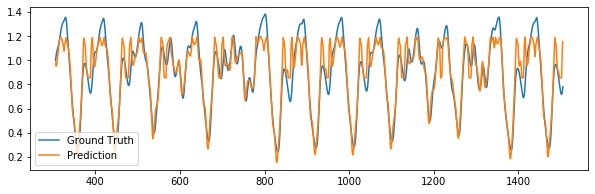

In [164]:
predictY = []
for i in range(301, 1501):
    testCase = [[time_series[i - 20], time_series[i - 15], time_series[i - 10], time_series[i - 5], time_series[i]]]
    predictY.append(model.predict(testCase))
plt.plot(range(306, 1506), ts[306:1506], label = "Ground Truth")
plt.plot(range(306, 1506), predictY, label = "Prediction")
plt.legend()
plt.show()

## 4.3.2 try different node numbers 

In [165]:
firsrLayer_nodeNum=[2,4]
secondLayer_nodeNum=[2,5,15]

for n1 in firsrLayer_nodeNum:
    for n2 in secondLayer_nodeNum:
        hidden_node_size=(n1,n2)
        model = MLPRegressor(max_iter=10000, solver='lbfgs', alpha=10 ** (-3), hidden_layer_sizes=hidden_node_size, random_state = 1,early_stopping=True,shuffle=False, validation_fraction = 0.1)
        model.fit(trainX, trainY)

        tmpX, X_val, tmpY, Y_val = train_test_split(trainX, trainY, random_state = 1, test_size = 0.1)
        print(model.score(X_val, Y_val))
        #print(model.score(testX, testY))

0.8788827013086464
0.8474369470866812
0.8786202625807917
-0.00027031813211109146
0.9824218461835243
0.9878149270832552


0.002895307283871549


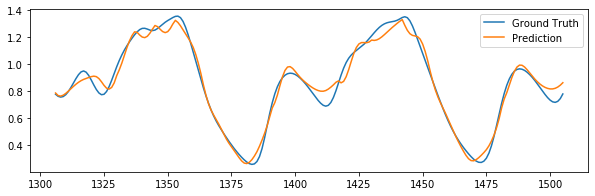

In [166]:
# use sgd
reg_model = MLPRegressor(hidden_layer_sizes=(4,15), alpha=0.2, learning_rate_init=0.01, max_iter=10000, shuffle=False, \
momentum=0.9, early_stopping=True, validation_fraction=0.1, beta_1=0.9,beta_2=0.999, epsilon=1e-08, n_iter_no_change=1000, solver='sgd')
reg_model.fit(trainX, trainY)

predY= reg_model.predict(testX)
MSE = metrics.mean_squared_error(predY,testY)
print(MSE)
# plot for best model on test set
predictY = []
for i in range(1301, 1501):
    testCase = [[time_series[i - 20], time_series[i - 15], time_series[i - 10], time_series[i - 5], time_series[i]]]
    predictY.append(reg_model.predict(testCase))
plt.plot(range(1306, 1506), ts[1306:1506], label = "Ground Truth")
plt.plot(range(1306, 1506), predictY, label = "Prediction")
plt.legend()
plt.show()

In [122]:
# best model's performance
model = MLPRegressor(max_iter=10000, solver='lbfgs', alpha=10 ** (-3), hidden_layer_sizes=(4,15),random_state = 1,early_stopping=True,shuffle=False, validation_fraction = 0.1)
model.fit(trainX, trainY)
predY= model.predict(testX)

MSE = metrics.mean_squared_error(predY,testY)
print(MSE)


0.0011319660859768267


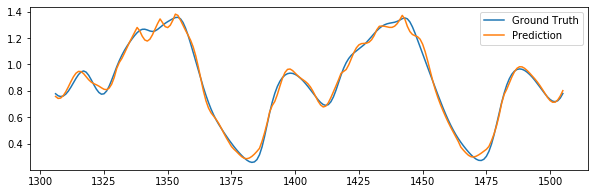

In [123]:
# plot for best model on test set
predictY = []
for i in range(1301, 1501):
    testCase = [[time_series[i - 20], time_series[i - 15], time_series[i - 10], time_series[i - 5], time_series[i]]]
    predictY.append(model.predict(testCase))
plt.plot(range(1306, 1506), ts[1306:1506], label = "Ground Truth")
plt.plot(range(1306, 1506), predictY, label = "Prediction")
plt.legend()
plt.show()

In [94]:
# worst model's performance
model = MLPRegressor(max_iter=10000, solver='lbfgs', alpha=10 ** (-3), hidden_layer_sizes=(2,5),early_stopping=True,shuffle=False, validation_fraction = 0.1)
model.fit(trainX, trainY)
predY= model.predict(testX)
MSE = metrics.mean_squared_error(predY,testY)
print(MSE)

0.00936834809430405


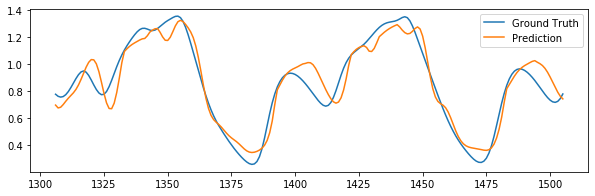

In [95]:
# plot for best model on test set
predictY = []
for i in range(1301, 1501):
    testCase = [[time_series[i - 20], time_series[i - 15], time_series[i - 10], time_series[i - 5], time_series[i]]]
    predictY.append(model.predict(testCase))
plt.plot(range(1306, 1506), ts[1306:1506], label = "Ground Truth")
plt.plot(range(1306, 1506), predictY, label = "Prediction")
plt.legend()
plt.show()

In [ ]:
regs=[i for i in range(2,6)] #regularization term

## 4.3.3 add in noise fix n_h1 and varies only n_h2

In [169]:
n1=4
secondLayer_nodeNum=[2,5,15]
g_noises = [0.05, 0.3] # param for  noises
regs=[1,3,5] #alpha: param for weight decay (L2 reg)
results = np.zeros((3,3))

sigma=0.3
for q,n2 in enumerate(secondLayer_nodeNum):
    for l,reg in enumerate(regs):
        #trainY = copy.deepcopy(trainY_copy)
        for i in range(len(trainY)):
            trainY[i] = trainY[i] + np.random.normal(0, sigma)
        #trainY=np.ravel(trainY) 
        hidden_node_size=(n1,n2)
        model = MLPRegressor(max_iter=10000, solver='lbfgs', alpha=10 ** (-reg), hidden_layer_sizes=hidden_node_size, random_state = 1,early_stopping=True,shuffle=False, validation_fraction = 0.1)
        model.fit(trainX, trainY)

        tmpX, X_val, tmpY, Y_val = train_test_split(trainX, trainY, random_state = 1, test_size = 0.1)
        score=model.score(X_val, Y_val)
        print('reg : '+str(reg)+'  / n2 : '+str(n2)+'--> '+str(score))
        #results[q][l]=score
print(results)

reg : 1  / n2 : 2--> -0.01562365279119482
reg : 3  / n2 : 2--> -0.008492279614169096
reg : 5  / n2 : 2--> -0.011025218465167352
reg : 1  / n2 : 5--> 0.07361327008412233
reg : 3  / n2 : 5--> 0.018512518332282513
reg : 5  / n2 : 5--> 0.021561376037223523
reg : 1  / n2 : 15--> 0.09164386919652412
reg : 3  / n2 : 15--> 0.04624151933960963
reg : 5  / n2 : 15--> 0.009218821404104682
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [141]:
print(results)

[[ 0.96275839  0.84891395 -0.00185046]
 [ 0.96365917  0.95798032  0.94935871]
 [ 0.96163481  0.94759427  0.95625405]]


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def findEulerSolution(t, beta, gamma, n, tau):
    X = [0.0 for x in range(t)]
    X[0] = 1.5
    for i in range(t-1):
        X[i+1] = X[i] + ((beta * X[i-tau]) / (1 + ((X[i-tau]**n)))) - gamma * X[i]
    return X

def generate_MG_data():
    beta = 0.2
    gamma = 0.1
    tau = 25
    n = 10
    start = 301
    end = 1500

    input = np.zeros((1199, 5))
    target = np.zeros((1199,1))
    X = findEulerSolution(end+5, beta, gamma, n, tau)
    print(" len of X = ", len(X))
    for ind,t in enumerate(range(start,end)):
        # print("t-start = ", ind)
        input[t-start][0] = X[t-20]
        input[t-start][1] = X[t-15]
        input[t-start][2] = X[t-10]
        input[t-start][3] = X[t-5]
        input[t-start][4] = X[t]
        target[t-start][0] = X[t+5]

    print(input.shape)
    print(target.shape)
    plt.plot(range(start,end), target.flatten())
    plt.xlabel("time")
    plt.ylabel("Output of mackey glass time series equation")
    plt.title("plot of mackey glass time series")
    plt.show()
    return input, target

 len of X =  1505
(1199, 5)
(1199, 1)


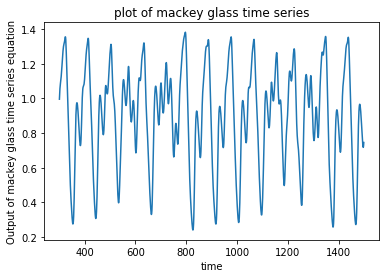

(array([[0.8944555 , 0.93800067, 0.8537292 , 0.73662456, 0.74588625],
        [0.92100416, 0.92730868, 0.83021651, 0.71986036, 0.78564711],
        [0.93702004, 0.91291144, 0.80575843, 0.70972683, 0.83700733],
        ...,
        [0.39572867, 0.78383396, 0.96222675, 0.92383355, 0.80257268],
        [0.46553233, 0.84419548, 0.96652803, 0.90326629, 0.77699998],
        [0.54603805, 0.89153676, 0.96363058, 0.88017956, 0.75374514]]),
 array([[0.99567019],
        [1.03083227],
        [1.05574157],
        ...,
        [0.71790102],
        [0.72524919],
        [0.74578625]]))

In [14]:
generate_MG_data()